In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt

In [2]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_bilstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
batch_size = 64
epochs = 5

history_rnn = model_rnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                            validation_data=(x_test, y_test))

history_lstm = model_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                              validation_data=(x_test, y_test))

history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                  validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 143ms/step - accuracy: 0.5699 - loss: 0.6644 - val_accuracy: 0.7495 - val_loss: 0.5152
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 151ms/step - accuracy: 0.7483 - loss: 0.5201 - val_accuracy: 0.7784 - val_loss: 0.4772
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.7517 - loss: 0.5252 - val_accuracy: 0.6180 - val_loss: 0.6449
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.6823 - loss: 0.5933 - val_accuracy: 0.6511 - val_loss: 0.6183
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.7465 - loss: 0.5111 - val_accuracy: 0.6724 - val_loss: 0.7002
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 212s 537ms/step - accuracy: 0.6937 - loss: 0.5476 - val_accuracy: 0.8536 - val_loss: 0.3800
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 264s 541ms/step - accuracy: 0.8960 - loss: 0.2731 - val_accuracy: 0.8675 - val_loss: 0.3239
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 211s 539ms/step - accuracy: 0.9324 - loss: 0.1813

In [7]:
results_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
results_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
results_bilstm = model_bilstm.evaluate(x_test, y_test, verbose=0)

print(f"Simple RNN Accuracy: {results_rnn[1]*100:.2f}%")
print(f"LSTM Accuracy: {results_lstm[1]*100:.2f}%")
print(f"BiLSTM Accuracy: {results_bilstm[1]*100:.2f}%")

Simple RNN Accuracy: 67.24%
LSTM Accuracy: 84.82%
BiLSTM Accuracy: 86.49%


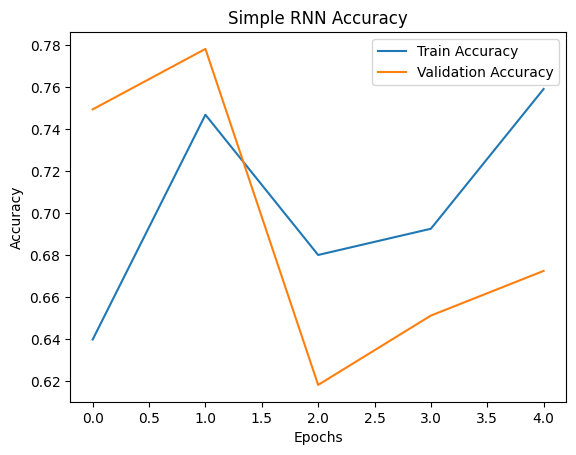

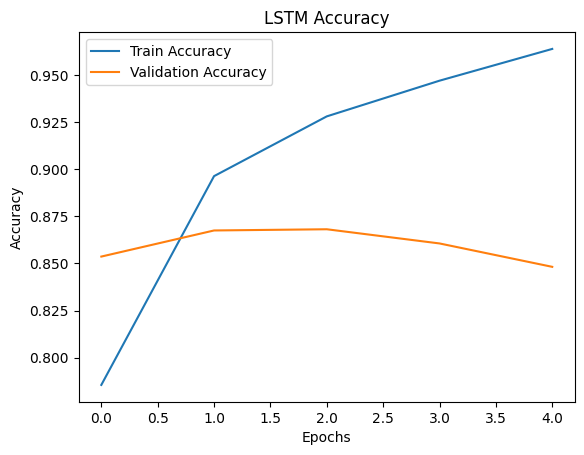

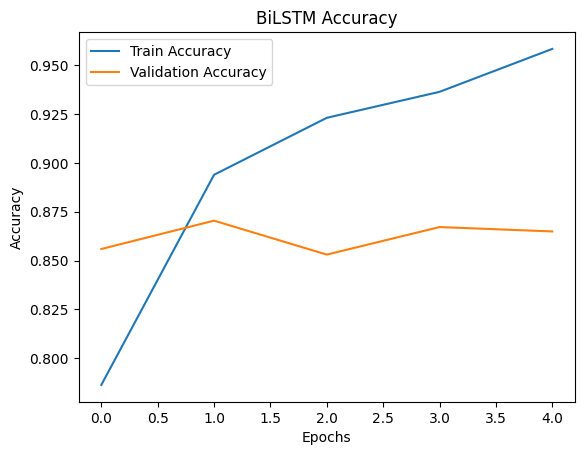

In [8]:
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_rnn, "Simple RNN Accuracy")
plot_accuracy(history_lstm, "LSTM Accuracy")
plot_accuracy(history_bilstm, "BiLSTM Accuracy")